# In this tutorial, you will learn how to develop a Machine Learning classifier for the automatic detection of handwritten digits.

# The challenge of handwritten digit classification in machine learning revolves around the creation of algorithms and models designed to accurately identify and assign labels to handwritten digits. Throughout this tutorial, we will primarily utilize the scikit-learn (sklearn) library for this purpose.


In [1]:
# Import necessary libraries
import numpy as np
import matplotlib.pyplot as plt
from sklearn import datasets
from sklearn.model_selection import train_test_split
from sklearn.neural_network import MLPClassifier
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix, ConfusionMatrixDisplay

In [2]:
# Load the MNIST dataset
digits = datasets.load_digits()

In [3]:
# Split the data into features and labels
X = digits.images
y = digits.target

In [4]:
X = digits['images']
y = digits['target']

print(f'Images (x) Shape : {X.shape}')
print(f'Target (y) Shape : {y.shape}')

Images (x) Shape : (1797, 8, 8)
Target (y) Shape : (1797,)


True  Value: 9


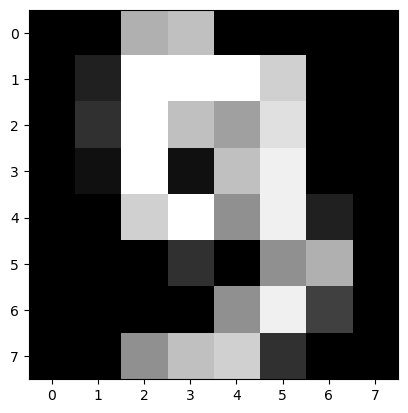

In [5]:
# Display sample data
plt.imshow(X[9], cmap=plt.cm.gray )
print(f'True  Value: {y[9]}')

True  Value: 0


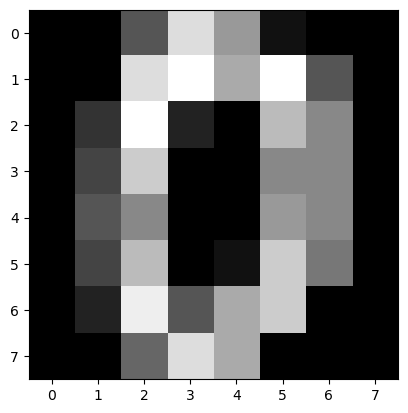

In [6]:
#
# Your code to display any other sample image and its true value.
#
plt.imshow(X[0], cmap=plt.cm.gray )
print(f'True  Value: {y[0]}')
# plt.imshow(X[2], cmap=plt.cm.gray )
# print(f'True  Value: {y[2]}')

The following plot prints a bunch of digits. However, the X-axis of the subplot looks a bit messy from the second row. Improve the plot to make it look better.

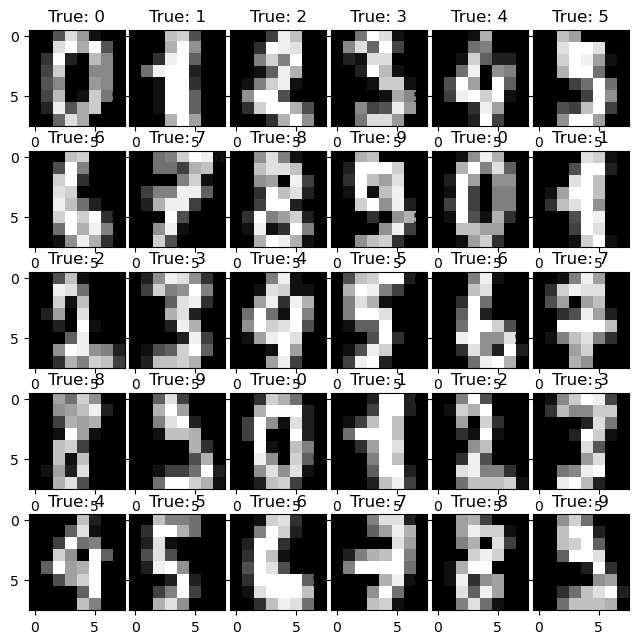

In [7]:
# Display sample data i.e. a bunch of images.
fig = plt.figure(figsize=(6, 6))  # figure size in inches
fig.subplots_adjust(left=0, right=1, bottom=0, top=1, hspace=0.05, wspace=0.05)

for i in range(30):
    plt.subplot(5, 6, i + 1)
    plt.imshow(X[i], cmap=plt.cm.gray )
    plt.title(f"True: {y[i]}")

plt.show()

In [8]:
# Flatten the images into a 1D array
n_samples = len(X)
X = X.reshape((n_samples, -1))

In [9]:
# Split the dataset into a training set and a test set
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.5, random_state=0)


In [10]:
# Flatten the images into a 1D array
n_samples = len(X)
X = X.reshape((n_samples, -1))

In [11]:
# Create an MLP classifier with 2 hidden layers with 100 neurons in each layer
clf = MLPClassifier(hidden_layer_sizes=(100, 100), max_iter=1000)

In [12]:
# Train the classifier on the training data
clf.fit(X_train, y_train)

MLPClassifier(hidden_layer_sizes=(100, 100), max_iter=1000)

In [13]:
# Make predictions on the test data
y_pred = clf.predict(X_test)

In [14]:
# Calculate the accuracy of the classifier
accuracy1 = accuracy_score(y_test, y_pred)
print(f'Accuracy: {accuracy1 * 100:.2f}%')

Accuracy: 96.89%


In [15]:
# Generate a classification report
report = classification_report(y_test, y_pred)
print(report)

              precision    recall  f1-score   support

           0       1.00      1.00      1.00        89
           1       0.95      0.99      0.97        90
           2       1.00      0.98      0.99        92
           3       0.99      0.97      0.98        93
           4       0.99      0.99      0.99        76
           5       0.93      0.94      0.93       108
           6       0.98      0.99      0.98        89
           7       0.96      0.99      0.97        78
           8       0.98      0.90      0.94        92
           9       0.94      0.97      0.95        92

    accuracy                           0.97       899
   macro avg       0.97      0.97      0.97       899
weighted avg       0.97      0.97      0.97       899



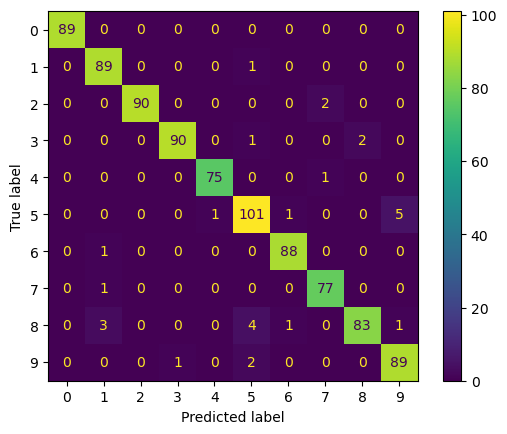

In [16]:

# Plot the confusion matrix
cm = confusion_matrix(y_test, y_pred, labels=clf.classes_)
disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=clf.classes_)
disp.plot()

# Next, try three other different MLP models with various configurations, such as the number of hidden layers, the number of neurons in each hidden layer, different learning rates, different numbers of iterations to train the model, or different optimization functions.

#Use the configuration of your choice.

# Use the MLPClassifier() class from scikit-learn, which you can find here: https://scikit-learn.org/stable/modules/generated/sklearn.neural_network.MLPClassifier.html .

# You should store the accuracy of each model in a separate variable or a list.

# Create a bar graph comparing the accuracy of all the models. To do this, you can use the 'barh' class from the Python pyplot library, which is explained here:
https://matplotlib.org/3.1.1/api/_as_gen/matplotlib.pyplot.barh.html

# **Important -** Document in your lab logbook:

# 1. The output of the neural network model provided in task 1.
# 2. A bar plot comparing the accuracy of the different MLP models from your code.

CLF1 Accuracy: 96.89%
CLF2 Accuracy: 94.55%
CLF3 Accuracy: 95.66%


<BarContainer object of 3 artists>

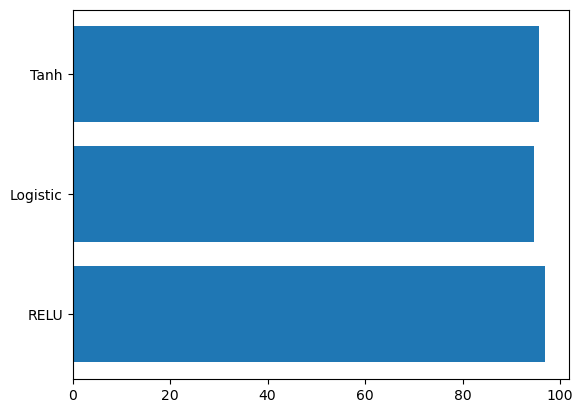

In [38]:
#
# Your code to compare the different models and bar plot comparing model accuracy.
# You can split your code in multiple cells
#
print(f'CLF1 Accuracy: {accuracy1 * 100:.2f}%')

clf2 = MLPClassifier(hidden_layer_sizes=(50, 34, 20), max_iter=3000, activation='logistic', solver='adam', alpha=0.0002, learning_rate='invscaling')
clf2.fit(X_train, y_train)

y_pred2 = clf2.predict(X_test)

accuracy2 = accuracy_score(y_test, y_pred2)
print(f'CLF2 Accuracy: {accuracy2 * 100:.2f}%')

clf3 = MLPClassifier(hidden_layer_sizes=(76, 100, 80), max_iter=1000, activation='tanh', solver='lbfgs', alpha=0.001, learning_rate='adaptive')
clf3.fit(X_train, y_train)

y_pred3 = clf3.predict(X_test)

accuracy3 = accuracy_score(y_test, y_pred3)
print(f'CLF3 Accuracy: {accuracy3 * 100:.2f}%')

a1 = round((accuracy1*100), 2)
a2 = round((accuracy2*100), 2)
a3 = round((accuracy3*100), 2)

plt.barh(['RELU', 'Logistic', 'Tanh'],[a1, a2, a3])


# Write code to display 10 images from X_test, along with their true values and predicted values for any MLP model. Your plot should resemble the following:

# Hint: You'll need to use the 'reshape' function.

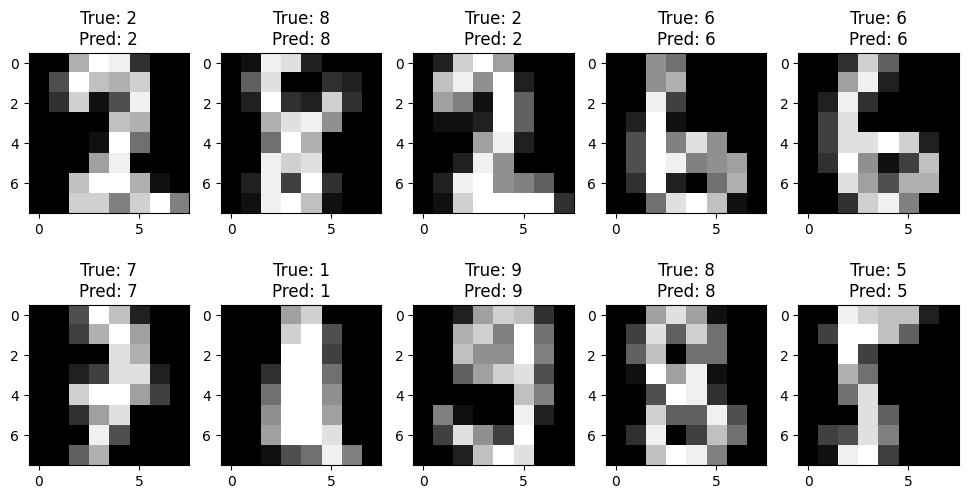

In [18]:
plt.figure(figsize=(12, 8))
for i in range(10):
    plt.subplot(2, 5, i + 1)
    plt.imshow(X_test[i].reshape(8, 8), cmap=plt.cm.gray)
    plt.title(f"True Values: {y_test[i]} \n Predicted Values: {y_pred[i]}")
plt.show()